In [2]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import cv2

from superpoint.settings import DATA_PATH
from superpoint.models.homographies import sample_homography, invert_homography
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
base_path = Path(DATA_PATH, 'dataset_001_002/images_subsampled')
filename = Path(base_path, 'seq_001_out1601.png')

In [4]:
config = {
    'translation': True,
    'rotation': True,
    'scaling': True,
    'perspective': True,
    'scaling_amplitude': 0.2,
    'perspective_amplitude_x': 0.2,
    'perspective_amplitude_y': 0.2,
    'patch_ratio': 0.85,
    'max_angle': 1.57,
    'allow_artifacts': True,
}

In [5]:
tf.reset_default_graph()
image = tf.image.decode_jpeg(tf.read_file(str(filename)), channels=1)
shape = tf.shape(image)[:2]
H = sample_homography(shape, **config)
H_inv = invert_homography(H)
warped = tf.contrib.image.transform(image, H, interpolation="BILINEAR")
mask = tf.contrib.image.transform(tf.ones(shape), H_inv, interpolation="BILINEAR")

Instructions for updating:
Use tf.cast instead.


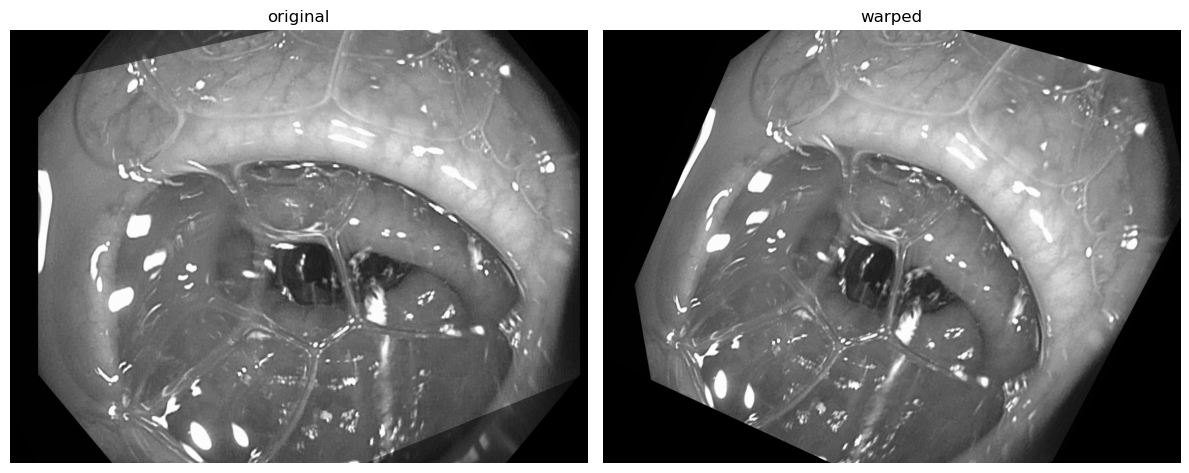

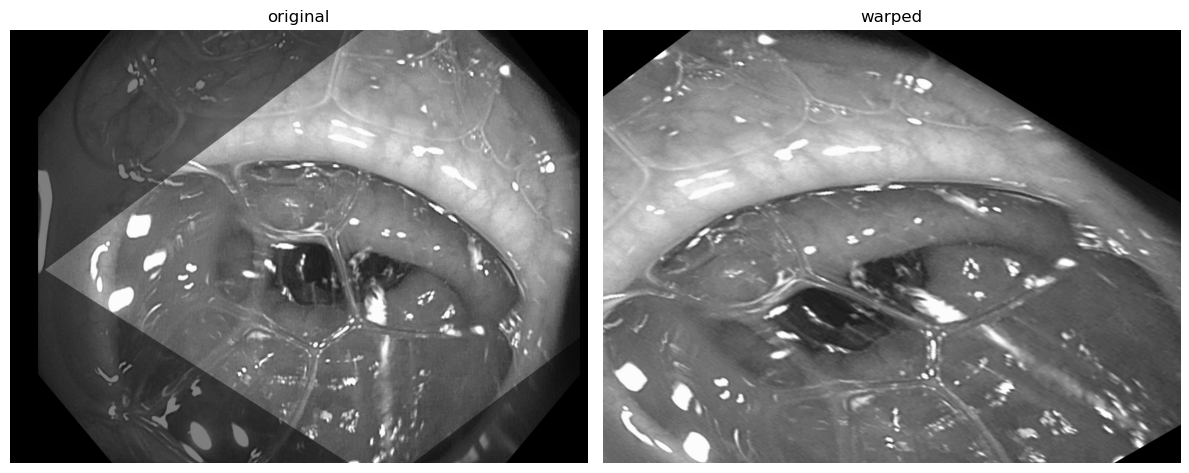

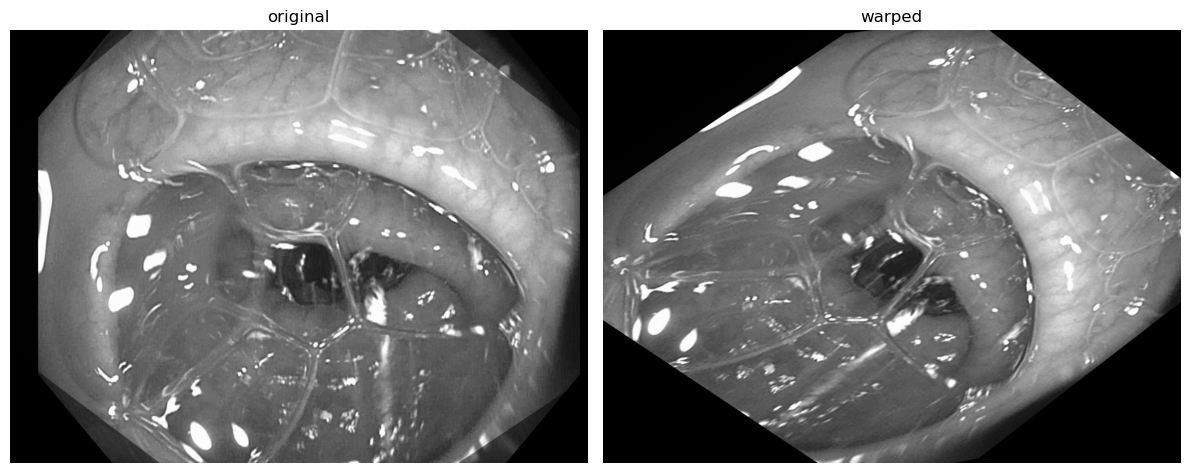

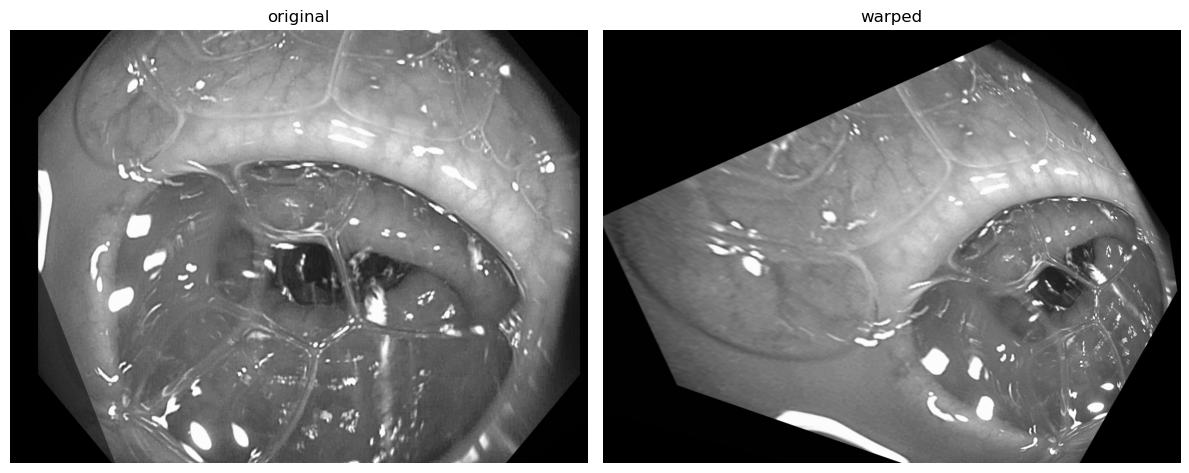

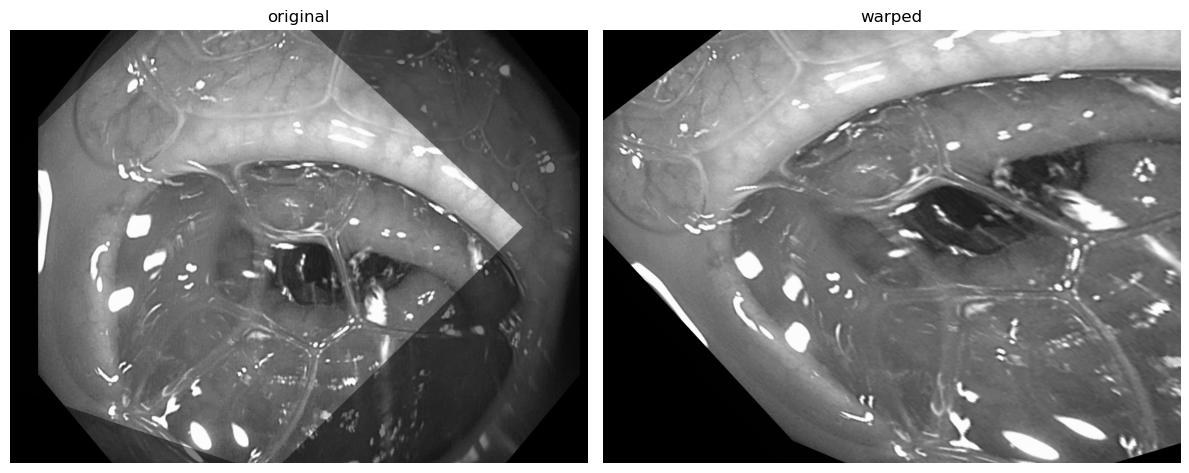

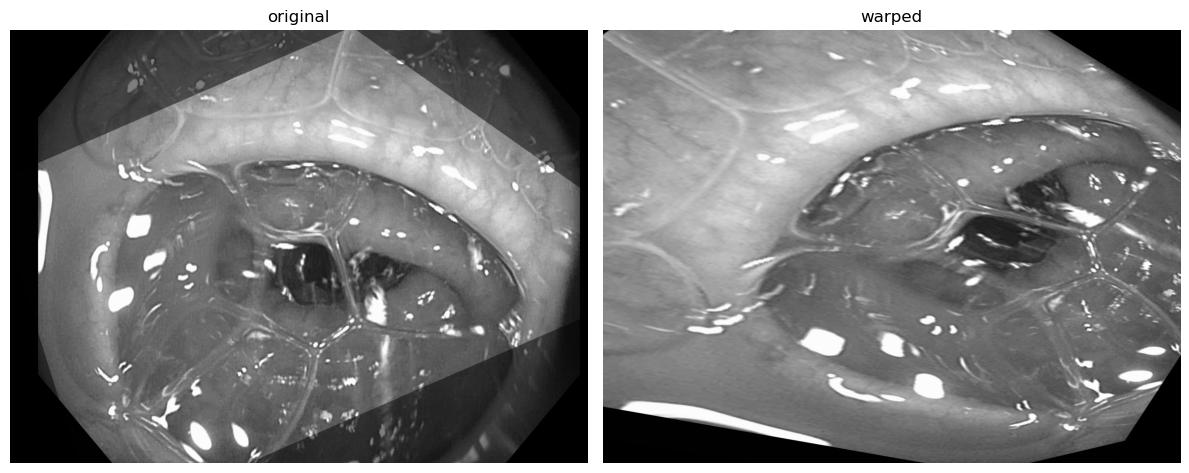

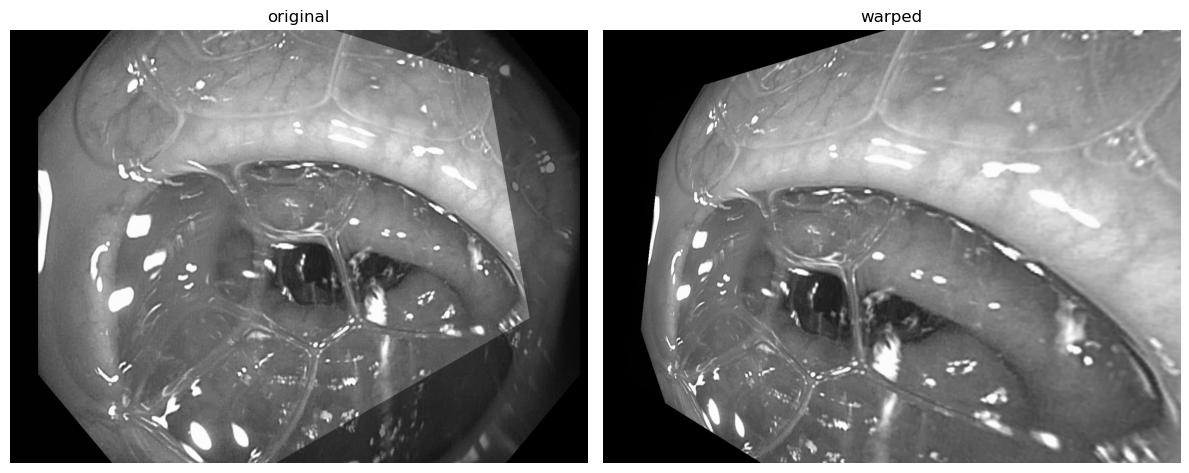

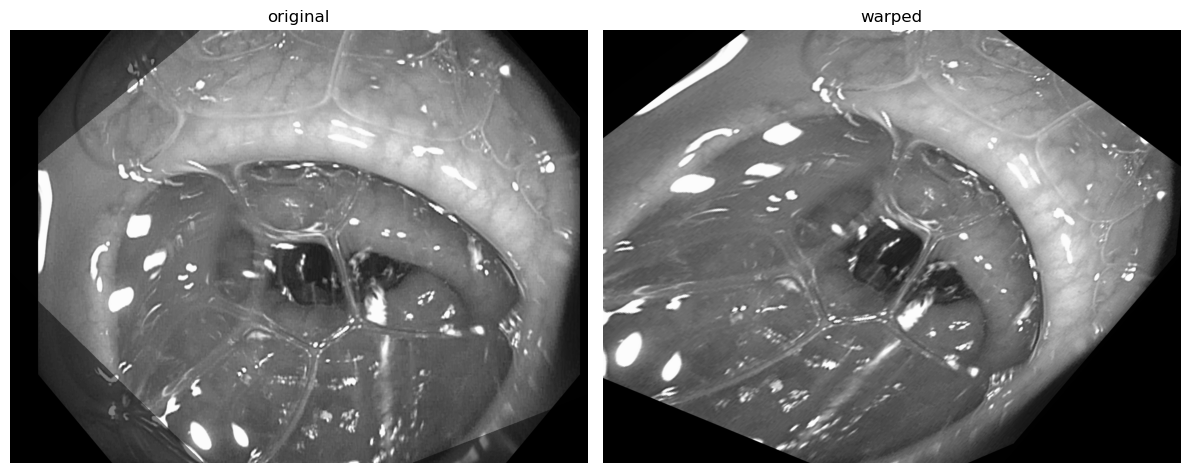

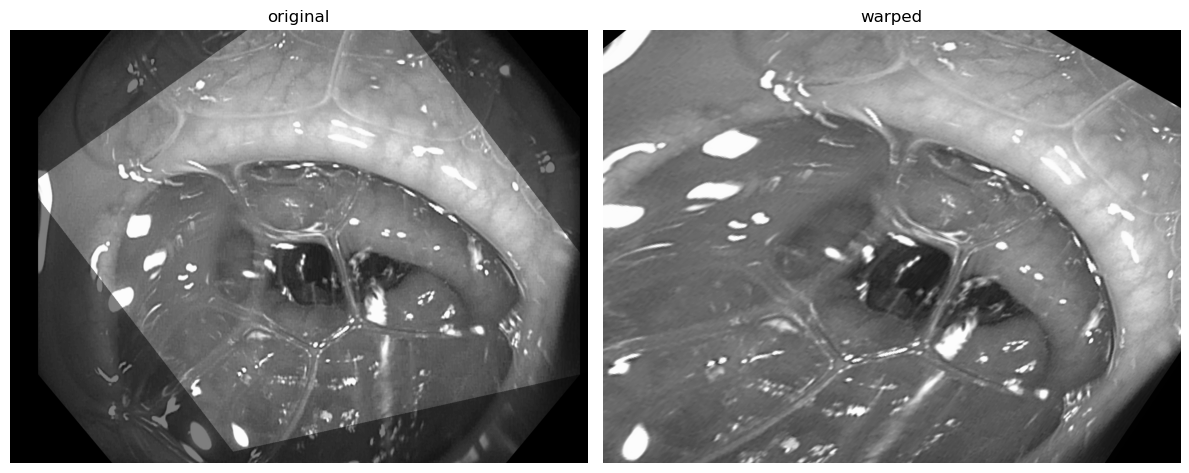

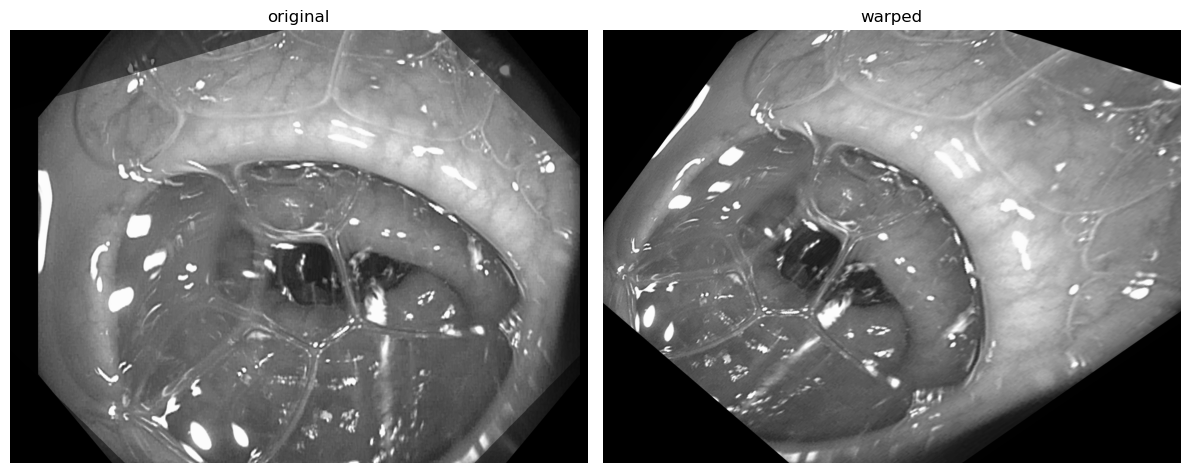

In [6]:
with tf.Session() as sess:
    for _ in range(10):
        im, wr, m = sess.run([image, warped, mask])
        idx = np.where(np.logical_not(m))
        im[idx] = im[idx] / 2
        plot_imgs([im[..., 0]/255., wr[..., 0]/255.], cmap='gray', titles=['original', 'warped'])